In [1084]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [1085]:
#Importing the 2 DataFrames 'names' and 'reviews'
names = pd.read_csv('Restaurant_names.csv')
reviews = pd.read_csv('Restaurant_reviews.csv')

In [982]:
#Here each row represents one restaurant in Hyderabad, India along with Zomato Link, Cost to dine for two
#Cusisines, Collections (Zomato classifies restaurants this way,, not in scope for our analysis), Timings 
names.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [983]:
#Each row here is a review for a specific Restaurant from the names DataFrame along with Rating and some user specific information
reviews.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [984]:
# Renaming columns in both tables preparing for the join
reviews = reviews.rename(columns={'Restaurant':'Name'})

In [985]:
#Performing a left join 
df = pd.merge(names,reviews,how = 'left', on='Name')

In [986]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')

In [987]:
#Dropping the columns that not relevant to our analysis
df.drop(['Reviewer','Time','Pictures', 'Links','Collections'], axis =1, inplace=True)

In [988]:
df.head(5)

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers"
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers"
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers"
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower"
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers"


In [989]:
# Identified a text based value in the Rating column
df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [990]:
df[df['Rating'] == 'Like']

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata
7601,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers"


In [991]:
df[df['Name'] == 'The Old Madras Baking Company']

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata
7600,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,Nestled between the hustle bustle of Gachibowl...,4,"50 Reviews , 161 Followers"
7601,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers"
7602,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,One of the best places to fill your stomach wi...,4,"17 Reviews , 64 Followers"
7603,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,Absolutely pathetic. I placed an order for hal...,1,"13 Reviews , 63 Followers"
7604,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,Went to this place for lunch. Ordered and paid...,1,"17 Reviews , 12 Followers"
...,...,...,...,...,...,...,...
7695,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,One definitely have to try their coconut bun a...,5,"22 Reviews , 116 Followers"
7696,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,"I liked the ambience, the wooden tables looked...",4,"14 Reviews , 31 Followers"
7697,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,Good place for bakery food. Mutligrain cereal ...,4,"49 Reviews , 987 Followers"
7698,The Old Madras Baking Company,350,Bakery,7 AM to 11 PM,Visited this place on a hot sultry morning. Or...,4,"15 Reviews , 1211 Followers"


In [992]:
#We notice that more than half the ratings are between 4 & 5
df['Rating'][df['Name'] == 'The Old Madras Baking Company'].value_counts()

4       43
5       22
3       18
1       10
2        6
Like     1
Name: Rating, dtype: int64

In [993]:
df['Cost'].dtype

dtype('O')

In [994]:
#Cleaning up the cost field and replacing the rating with a value of 4
df['Cost'] = df['Cost'].str.replace(',','').astype(int)
df['Rating'] = df['Rating'].str.replace('Like','4').astype(float)

In [995]:
df['Rating'][df['Name'] == 'The Old Madras Baking Company'].value_counts()

4.0    44
5.0    22
3.0    18
1.0    10
2.0     6
Name: Rating, dtype: int64

In [996]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10005 non-null  object 
 1   Cost      10005 non-null  int64  
 2   Cuisines  10005 non-null  object 
 3   Timings   9905 non-null   object 
 4   Review    9955 non-null   object 
 5   Rating    9962 non-null   float64
 6   Metadata  9962 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 625.3+ KB


In [997]:
len(df)

10005

In [998]:
#checking for nulls
print(df.isnull().sum())

Name          0
Cost          0
Cuisines      0
Timings     100
Review       50
Rating       43
Metadata     43
dtype: int64


In [999]:

df['Name'][df['Rating'].isnull() == True].value_counts()

American Wild Wings                       23
Arena Eleven                              15
IndiBlaze                                  1
Sweet Basket                               1
Angaara Counts 3                           1
Wich Please                                1
Republic Of Noodles - Lemon Tree Hotel     1
Name: Name, dtype: int64

In [1000]:
#calculating the mean Rating for the Restaurants with Null values in Rating
print('Mean of American Wild Wings =', df['Rating'][df['Name'] == 'American Wild Wings'].mean())
print('Mean of Arena Eleven', df['Rating'][df['Name'] == 'Arena Eleven'].mean())
print('Mean of Indiblaze', df['Rating'][df['Name'] == 'IndiBlaze'].mean())
print('Mean of Sweet Basket', df['Rating'][df['Name'] == 'Sweet Basket'].mean())
print('Mean of Angaara Counts 3', df['Rating'][df['Name'] == 'Angaara Counts 3'].mean())
print('Mean of Wich Please', df['Rating'][df['Name'] == 'Wich Please'].mean())
print('Mean of Republic of Noodles', df['Rating'][df['Name'] == 'Republic Of Noodles - Lemon Tree Hotel'].mean())

Mean of American Wild Wings = 3.9740259740259742
Mean of Arena Eleven 4.117647058823529
Mean of Indiblaze nan
Mean of Sweet Basket nan
Mean of Angaara Counts 3 nan
Mean of Wich Please nan
Mean of Republic of Noodles nan


In [1001]:
df[df['Name'] == 'Wich Please']

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata
10003,Wich Please,250,Fast Food,8am to 12:30AM (Mon-Sun),NaN,NaN,NaN


In [1002]:
# Deleting all the rows with nulls since they have just 1 row each and no ratings or reviews
df.drop(df[df['Name'] == 'IndiBlaze'].index, inplace=True)
df.drop(df[df['Name'] == 'Sweet Basket'].index, inplace=True)
df.drop(df[df['Name'] == 'Angaara Counts 3'].index, inplace=True)
df.drop(df[df['Name'] == 'Wich Please'].index, inplace=True)
df.drop(df[df['Name'] == 'Republic Of Noodles - Lemon Tree Hotel'].index, inplace=True)

In [1003]:
df[df['Name'] == 'Wich Please']

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata


In [1004]:
df['Name'][df['Rating'].isnull() == True].value_counts()

American Wild Wings    23
Arena Eleven           15
Name: Name, dtype: int64

In [1005]:
# Replace missing Ratings with the mean 
print('Mean Rating of American Wild Wings :', df['Rating'][df['Name'] == 'American Wild Wings'].mean())
print('Mean Rating of American Wild Wings :', df['Rating'][df['Name'] == 'Arena Eleven'].mean())

Mean Rating of American Wild Wings : 3.9740259740259742
Mean Rating of American Wild Wings : 4.117647058823529


In [1006]:
#Since the mean rating for the above 2 restaurants is ~4, replacing the value and fixing the nas in the Review column
df['Rating'].fillna(4, inplace=True)

df['Review'] = df['Review'].fillna('-')

In [1007]:
print(df.isnull().sum())

Name          0
Cost          0
Cuisines      0
Timings     100
Review        0
Rating        0
Metadata     38
dtype: int64


In [1008]:
df['Metadata'].head(7)

0     1 Review , 2 Followers
1    3 Reviews , 2 Followers
2    2 Reviews , 3 Followers
3      1 Review , 1 Follower
4    3 Reviews , 2 Followers
5                   1 Review
6                   1 Review
Name: Metadata, dtype: object

In [1009]:
df['Metadata'].fillna('0 Review, 0 Follower', inplace=True)

In [1010]:
print(df.isnull().sum())

Name          0
Cost          0
Cuisines      0
Timings     100
Review        0
Rating        0
Metadata      0
dtype: int64


In [1011]:
df['Metadata'] = df['Metadata'].str.replace('Reviews', 'Review')
df['Metadata'] = df['Metadata'].str.replace('Followers', 'Follower')

In [1012]:
df['Metadata'][df['Metadata'].str.endswith('w')] = df['Metadata'][df['Metadata'].str.endswith('w')] + ' , - Follower'

/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/3636189403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Metadata'][df['Metadata'].str.endswith('w')] = df['Metadata'][df['Metadata'].str.endswith('w')] + ' , - Follower'


In [1013]:
df['Metadata'].value_counts()

1 Review , - Follower         919
1 Review , 1 Follower         750
2 Review , 1 Follower         337
2 Review , - Follower         262
1 Review , 2 Follower         227
                             ... 
22 Review , 22 Follower         1
14 Review , 94 Follower         1
32 Review , 1445 Follower       1
33 Review , 8 Follower          1
472 Review , 1302 Follower      1
Name: Metadata, Length: 2478, dtype: int64

In [1014]:
#Splitting the Metadata column into Reviews and Follows
df[['Reviews', 'Follows']] = df['Metadata'].str.split(',', expand= True)

In [1015]:
df.head(5)

,Name,Cost,Cuisines,Timings,Review,Rating,Metadata,Reviews,Follows
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Follower",1 Review,2 Follower
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,"3 Review , 2 Follower",3 Review,2 Follower
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5.0,"2 Review , 3 Follower",2 Review,3 Follower
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",1 Review,1 Follower
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Review , 2 Follower",3 Review,2 Follower


In [1016]:
df['Reviews'] = df['Reviews'].str.replace('Review','')
df['Reviews'] = df['Reviews'].str.replace(' Posts','')
df['Reviews'] = df['Reviews'].str.replace(' Post','')
df['Follows'] = df['Follows'].str.replace(' Follower','')
df['Follows'] = df['Follows'].str.replace('-','0')

In [1017]:
df.drop(['Metadata'], axis = 1, inplace=True)

In [1018]:
df.head(2)

,Name,Cost,Cuisines,Timings,Review,Rating,Reviews,Follows
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,1,2
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,3,2


In [1019]:
df = df.sort_values(['Name','Cost'], ascending=False).reset_index()
df.drop(['index'],axis = 1, inplace=True)

In [1020]:
df.head(5)

,Name,Cost,Cuisines,Timings,Review,Rating,Reviews,Follows
0,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,I had ordered gobi methi paratha.. it was ok. ...,3.0,1,1
1,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,Food was good but it was all leaking from the ...,3.0,1,0
2,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,"Intially, yes,the food was really good they we...",3.0,9,0
3,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,Hyderabad's most worst and ugliest biryani i h...,1.0,1,1
4,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,Very good at quality guys..even packaging is e...,4.0,10,1


In [1021]:
restaurants = list(df['Name'].unique())
df['Mean_Rating'] =0
df['Mean_Reviews'] = 0
df['Mean_Follows'] = 0

In [1022]:
df['Reviews'] = df['Reviews'].astype(float)
df['Follows'] = df['Follows'].astype(float)

In [1023]:
#Calculating the Mean Reviews, Mean Follows and Mean Rating for each restaurant
for i in range(len(restaurants)):
    
    df['Mean_Rating'][df['Name'] == restaurants[i]] = df['Rating'][df['Name'] == restaurants[i]].mean()
    df['Mean_Reviews'][df['Name'] == restaurants[i]] = df['Reviews'][df['Name'] == restaurants[i]].mean()
    df['Mean_Follows'][df['Name'] == restaurants[i]] = df['Follows'][df['Name'] == restaurants[i]].mean()
    

/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2834146922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_Rating'][df['Name'] == restaurants[i]] = df['Rating'][df['Name'] == restaurants[i]].mean()
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2834146922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_Reviews'][df['Name'] == restaurants[i]] = df['Reviews'][df['Name'] == restaurants[i]].mean()
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2834146922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [1024]:
df.sample(5)

,Name,Cost,Cuisines,Timings,Review,Rating,Reviews,Follows,Mean_Rating,Mean_Reviews,Mean_Follows
7226,Dine O China,850,"Chinese, Asian, Momos",11:30AM to 11PM (Mon-Sun),The decor of the restaurant is simply wow. The...,5.0,1.0,0.0,3.370,16.10,112.34
2964,PourHouse7,1200,"North Indian, Continental, Chinese, Italian","12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon...",Pourhouse7 is a spacious roof top bar that off...,5.0,13.0,5.0,3.860,29.51,233.38
7848,Club Rogue,900,"North Indian, Fast Food",11 AM to 12 Midnight,One of the best places to hangout with friends...,4.0,28.0,326.0,2.880,20.85,124.61
2411,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,I have placed order for Mutton Haleem Special ...,1.0,1.0,0.0,3.210,14.33,118.43
4966,Karachi Cafe,600,"Cafe, Desserts, Fast Food",10 AM to 10 PM,Had cutlet.... was a big let down!! 👎 can do b...,2.0,1.0,0.0,3.715,42.26,217.13


In [1025]:
# Scaling the each of Mean Reviews, Mean Rating, Mean Follows between 1 and 5
scaler = MinMaxScaler(feature_range= (1,5))

df[['Mean_Rating', 'Mean_Reviews', 'Mean_Follows']] = scaler.fit_transform(df[['Mean_Rating', 'Mean_Reviews', 'Mean_Follows']]).round(2)

In [1026]:
df.head(3)

,Name,Cost,Cuisines,Timings,Review,Rating,Reviews,Follows,Mean_Rating,Mean_Reviews,Mean_Follows
0,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,I had ordered gobi methi paratha.. it was ok. ...,3.0,1.0,1.0,2.29,2.54,2.47
1,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,Food was good but it was all leaking from the ...,3.0,1.0,0.0,2.29,2.54,2.47
2,eat.fit,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,"Intially, yes,the food was really good they we...",3.0,9.0,0.0,2.29,2.54,2.47


In [1027]:

df[['Cuisines','Review']].sample(5)

,Cuisines,Review
5330,"North Indian, Japanese, Italian, Salad, Sushi",A peaceful n quite place is something u want a...
4979,"Cafe, Desserts, Fast Food",tho the is good he doesn't know the route . I ...
6280,"Burger, American",Food was cold
7672,"Ice Cream, Desserts",Cream stone is the best hangout place when it ...
3281,"Biryani, North Indian, Chinese",Good food with very good service. Their Biryan...


In [1028]:
#Cleaning the text based data in Cuisines and Review
replace_space = re.compile('[/(){}\[\]\|@,;]')
# Define symbols to be removed
remove_symbols = re.compile('[^0-9a-z #+_]')
# Define stopwords
stopwords = set(stopwords.words('english'))

def text_preprocessing(text):
    # Lowercase all the letters
    text = text.lower()
    
    # Replace these symbols with space
    text = replace_space.sub(' ', text)
    
    # Remove these symbols
    text = remove_symbols.sub('', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text

In [1029]:
df['Review'] = df['Review'].apply(text_preprocessing)
df['Cuisines'] = df['Cuisines'].apply(text_preprocessing)

In [1030]:
df[['Cuisines','Review']].sample(5)

,Cuisines,Review
7785,continental italian north indian chinese asian,came team dinner restaurant managers prathmesh...
6837,desserts cafe beverages burger fast food,complaints regarding taste quality timings ter...
2751,north indian south indian,good
4539,finger food north indian kebab chinese,la la land best place love dance musicwent pla...
3499,chinese biryani andhra north indian,food good really liked starters jeera rice gre...


<!-- Answering some of the business questions

1. What cuisine is the most popular?
2. Which restaurant has the best overall rating?
3. Which restaurants offer the best options for late-night cravings?
4. Which places offer the best deal by being light on the pocket?
 -->

### Some business questions answered 

1. What cuisine is the most popular?
2. Which restaurant has the best overall rating?
3. What are the most reviewed restaurants?
4. Which are some upscale places to dine at?


Text(0.5, 1.0, 'Top 10 Rated Restaurants in Hyderabad')

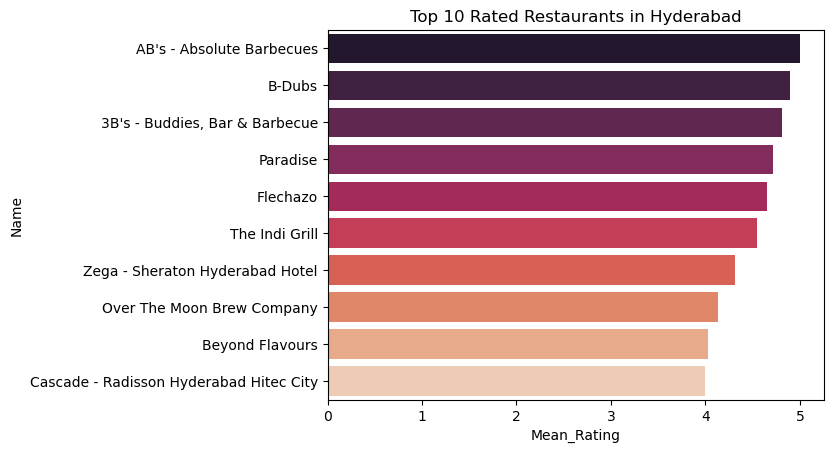

In [1031]:
#Which restaurant has the best overall rating?
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by = 'Mean_Rating', ascending= False).head(10)
sns.barplot(data = df_rating, x = 'Mean_Rating', y = 'Name', palette='rocket')
plt.title('Top 10 Rated Restaurants in Hyderabad')

Text(0.5, 1.0, 'Top 10 Reviewed Restaurants in Hyderabad')

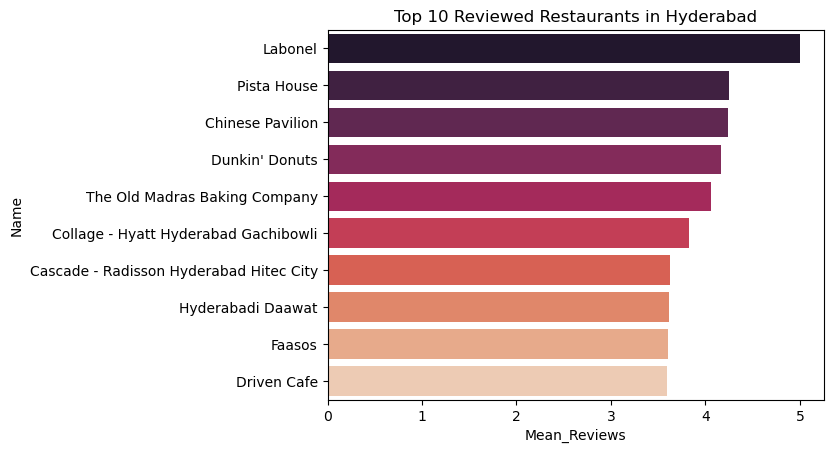

In [1032]:
# Most Reviewed Restaurants
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by = 'Mean_Reviews', ascending= False).head(10)
sns.barplot(data = df_rating, x = 'Mean_Reviews', y = 'Name', palette='rocket')
plt.title('Top 10 Reviewed Restaurants in Hyderabad')

Text(0.5, 1.0, 'Top 10 Restaurants by Cost to Dine in Hyderabad')

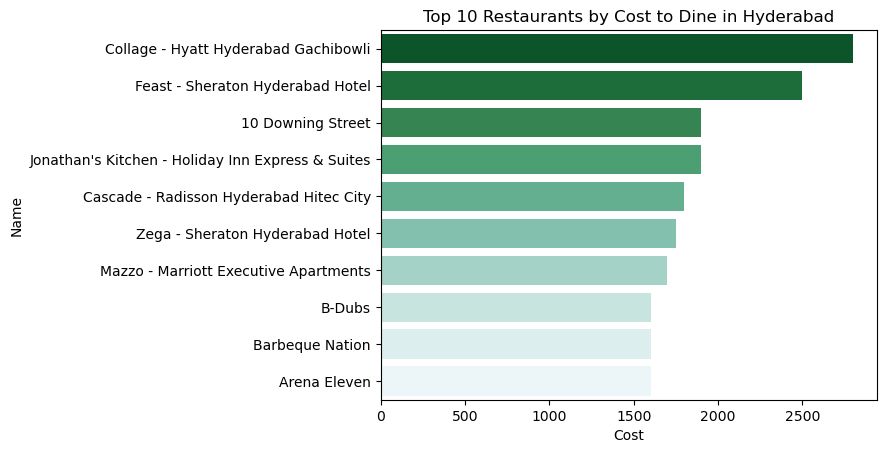

In [1033]:
# Top 10 Restaurants by Cost to Dine 
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by = 'Cost', ascending= False).head(10)
palette = sns.color_palette("BuGn",n_colors=10)
palette.reverse()
sns.barplot(data = df_rating, x = 'Cost', y = 'Name', palette=palette)
plt.title('Top 10 Restaurants by Cost to Dine in Hyderabad')

In [1034]:
#Removing duplicate Restaurant, Cuisines to consider only the 100 restaurants and their cuisines.
unique_rest_cusinies = df[['Name','Cuisines']]
unique_rest_cusinies = unique_rest_cusinies.drop_duplicates()
unique_rest_cusinies.head(5)

,Name,Cuisines
0,eat.fit,healthy food north indian continental south in...
100,Zing's Northeast Kitchen,north eastern momos
200,Zega - Sheraton Hyderabad Hotel,asian sushi
300,Yum Yum Tree - The Arabian Food Court,north indian hyderabadi
400,Urban Asia - Kitchen & Bar,asian thai chinese sushi momos


In [1048]:
# Finding the frequency of cuisines for the 100 restaurant to determine what type of food is most predominant
vectorizer = CountVectorizer(ngram_range= (2,2),stop_words = 'english')
 
count_matrix = vectorizer.fit_transform(unique_rest_cusinies['Cuisines'])
 
count_array = count_matrix.sum(axis = 0)
df1 = pd.DataFrame(data=count_array, columns = vectorizer.get_feature_names())


df2 = df1.transpose()
df2 = df2.reset_index(level=0)
df2.columns = ['cuisine', 'counts']
cuisines_counts = df2.sort_values(by='counts', ascending=False)
cuisines_counts.head()
    

/Users/rajesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cuisine,counts
116,north indian,60
82,indian chinese,25
64,fast food,13
122,south indian,9
51,continental italian,6


In [1049]:
cuisines_counts = cuisines_counts.head(20)

<AxesSubplot:xlabel='counts', ylabel='cuisine'>

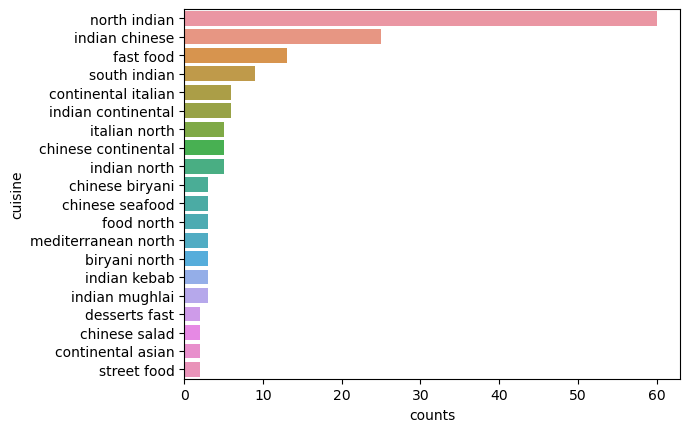

In [1050]:
#Which cuisines are popular?
sns.barplot(data = cuisines_counts, x = 'counts', y = 'cuisine')

In [1044]:
rest_reviews = df[['Name','Review']]
rest_reviews.sample(2)

,Name,Review
9684,AB's - Absolute Barbecues,thank bahadur nice gesture welcoming love way ...
8758,Banana Leaf Multicuisine Restaurant,one best economic buffet restaurant wide rangi...


In [1045]:
# Finding the frequency of words used in reviews to determine overall sentiment of reviewers
vectorizer = CountVectorizer(ngram_range= (2,2),stop_words = 'english')
 
count_matrix = vectorizer.fit_transform(rest_reviews['Review'])
 
count_array = count_matrix.sum(axis = 0)
df1 = pd.DataFrame(data=count_array, columns = vectorizer.get_feature_names())


df2 = df1.transpose()
df2 = df2.reset_index(level=0)
df2.columns = ['cuisine', 'counts']
review_freq_counts = df2.sort_values(by='counts', ascending=False)
review_freq_counts.head()

/Users/rajesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cuisine,counts
50808,food good,452
79541,main course,437
57299,good food,413
110251,really good,358
57783,good place,336


In [1046]:
review_freq_counts = review_freq_counts.head(20)

<AxesSubplot:xlabel='counts', ylabel='cuisine'>

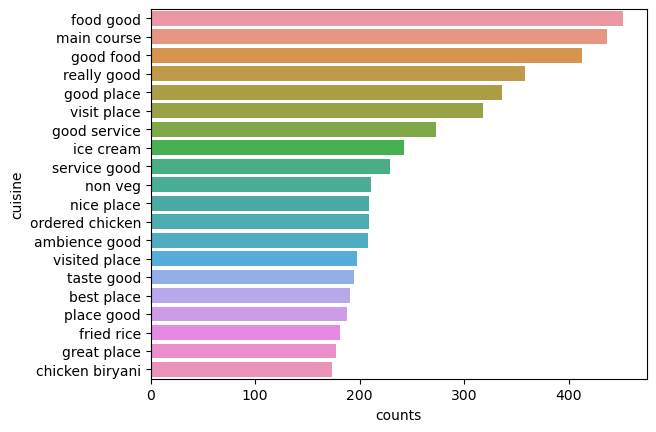

In [1047]:
# Most frequently used words in restaurant reviews
sns.barplot(data = review_freq_counts, x = 'counts', y = 'cuisine')

In [974]:
from wordcloud import WordCloud

In [1056]:
#Word Cloud showcasing the most common cuisines
word_cloud_dict = dict(zip(cuisines_counts['cuisine'].tolist(), review_freq_counts['counts'].tolist()))

In [1057]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_cloud_dict)

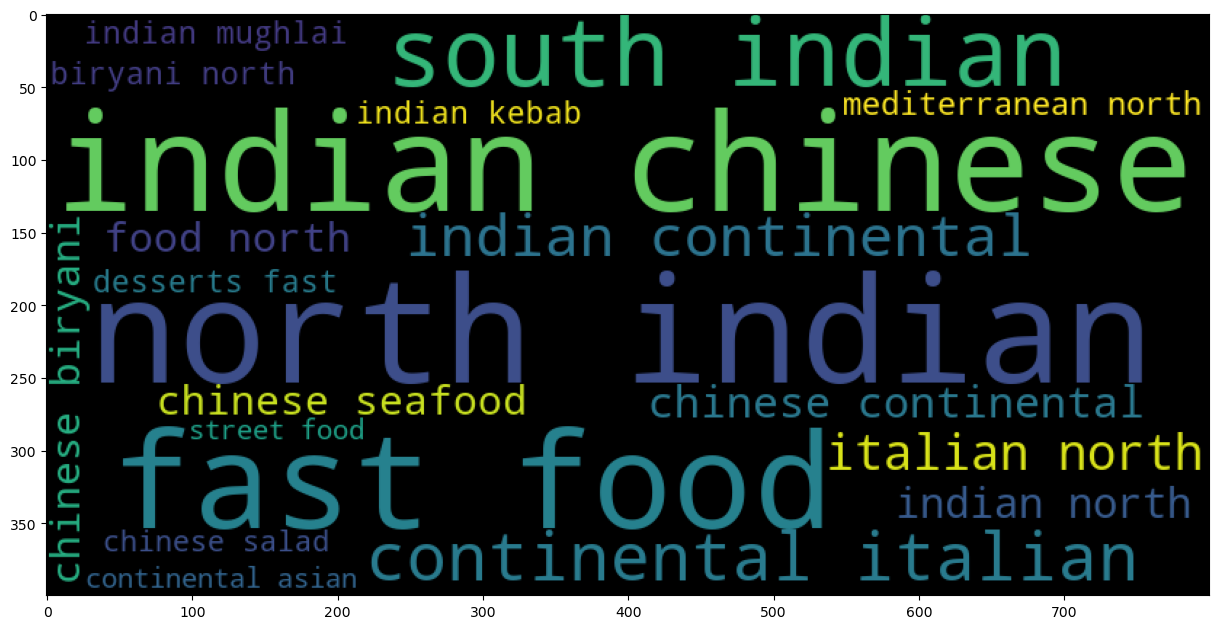

In [1058]:
plt.figure(figsize=(15,8))
plt.imshow(wc)

## The Recommendation System

In [1064]:
# Creating a TF-IDF Matrix and calculating the cosine similarities 

# Changing data set index by restaurant name
df_temp.set_index('Name', inplace=True)

# Saving indexes in a series
indices = pd.Series(df_temp.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_temp['Review'])

# Calculating cosine similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [1067]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from biggest number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-similarties value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Name','Cuisines', 'Mean_Rating', 'Cost', 'Timings'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Name','Cuisines','Mean_Rating', 'Cost', 'Timings'])
    df_new = df_new.sort_values(by='Mean_Rating', ascending=False).head(10)
    
    return df_new

### Testing the Recommendation System

__Top Restaurants like Labonel with similar reviews__

In [1072]:
recommend('Labonel')

/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index == each].sample()))
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index == each].sample()))
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index 

,Name,Cuisines,Mean_Rating,Cost,Timings
4400,Labonel,bakery desserts,3.44,1000,"11 AM to 8 PM (Mon-Sat), Sun Closed"
7653,Cream Stone,ice cream desserts,3.33,350,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
5037,Karachi Bakery,bakery fast food desserts,3.26,500,10 AM to 10 PM
4938,Karachi Cafe,cafe desserts fast food,3.12,600,10 AM to 10 PM
1096,The Old Madras Baking Company,bakery,2.97,350,7 AM to 11 PM


__Top Restaurants like Yum Yum Tree with similar reviews__

In [1083]:
recommend("Yum Yum Tree - The Arabian Food Court")

/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index == each].sample()))
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index == each].sample()))
/var/folders/cy/jqgb_3bd0t94k2zsfjl68hy00000gn/T/ipykernel_83347/2074475528.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(pd.DataFrame(df[['Name','Cuisines','Mean_Rating', 'Cost', 'Timings']][df.index 

,Name,Cuisines,Mean_Rating,Cost,Timings
3264,Paradise,biryani north indian chinese,4.71,800,11 AM to 11 PM
5503,Hyderabadi Daawat,hyderabadi chinese mughlai,3.31,600,12:30pm to 11:30pm (Mon-Sun)
4995,Karachi Cafe,cafe desserts fast food,3.12,600,10 AM to 10 PM
8790,Banana Leaf Multicuisine Restaurant,biryani south indian north indian chinese andhra,3.08,700,"12:30 PM to 3:30 PM, 7 PM to 10:40 PM"
300,Yum Yum Tree - The Arabian Food Court,north indian hyderabadi,2.87,1200,12 Noon to 12 Midnight
6008,Green Bawarchi Restaurant,north indian chinese biryani,2.76,700,12 Noon to 11 PM
4390,Marsala Food Company,arabian north indian chinese,2.71,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
3105,Pista House,bakery north indian mughlai juices chinese,2.34,1000,11 AM to 12 Midnight
9463,Al Saba Restaurant,north indian chinese seafood biryani hyderabadi,2.22,750,6 AM to 11:30 PM
7057,Domino's Pizza,fast food pizza,2.11,400,11 AM to 11 PM


### Thank you!